In [17]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans

In [18]:
image_path = ".//output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

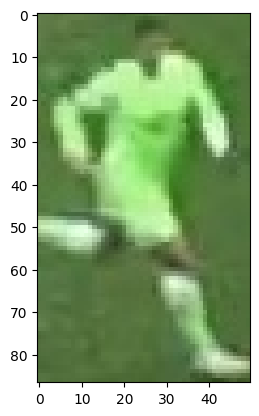

In [29]:
plt.imshow(image)

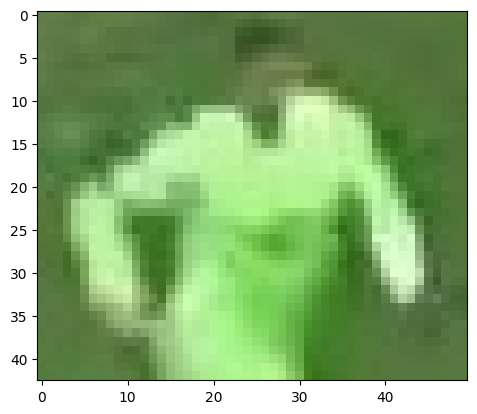

In [31]:
top_half_img = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_img)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


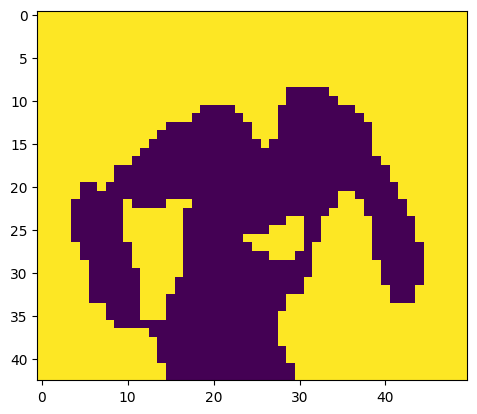

In [35]:
#Reshape the image to 2D
image_2d = top_half_img.reshape(-1, 3)

#Run a clusterring to remove background
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(image_2d)

labels = kmeans.labels_

clusterred_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

plt.imshow(clusterred_img)



In [36]:
corner_clusters = [clusterred_img[0,0], clusterred_img[0,-1], clusterred_img[-1,0], clusterred_img[-1,-1]]
non_player_clusters = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_clusters)

1


In [38]:
player_clusters = 1 - non_player_clusters
print(player_clusters)

0


In [39]:
kmeans.cluster_centers_[player_clusters]

array([168.05953992, 226.50338295, 140.90798376])